# Self-consistent mean field solution in real space

In [1]:
import sys
project_directory = '/Users/franciscobrito/projects/'
sys.path.append(project_directory + 'tmd-nanoribbon/mean-field/src/lib')
from lib.lib_tmd_model import setParams, HribbonRealSpace
from lib.lib_solvers import solve_self_consistent_real_space
from lib.lib_init_cond import *
from lib.lib_plot import showLattice, showGrandpotentialMinimization

In [21]:
# Number of orbitals in the model
nOrb = 3

# Dimensions of the ribbon
Nx = 8
Ny = 4

# Model parameters
t = 1
U = 20

# Choose TMD
tmd = 'MoS2'
abs_t0, e1, e2, t0, t1, t2, t11, t12, t22, \
E0, E1, E2, E3, E4, E5, E6 = setParams(tmd)
K = HribbonRealSpace(nOrb, Nx, Ny, E0, E1, E2, E3, E4, E5, E6)

# For a hole-doped system (0 means no holes)
nHole = 0

# Self-explanatory
anneal_or_not = True
osc = False

# Inverse temperature and annealing parameters
invTemp = 1
betaStart = 0.2
betaSpeed = 1.12
betaThreshold = 20

# Solver parameters
itMax = 100
dampFreq = 1
delta = 1e-20
singleExcitationFreq = itMax + 1
dyn = 'local'

# Initial conditions
nUp, nDown = row_antiferro(2 / 3, nOrb * Nx * Ny, Nx, nOrb)

# Show initial condition

This is the initial condition you chose:


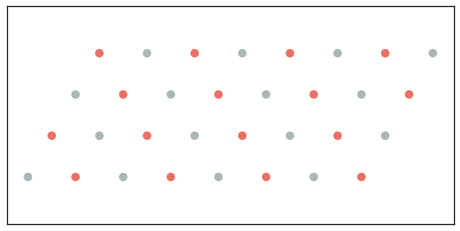

In [22]:
print("This is the initial condition you chose:")
dotscale = 100
SAVE = False
name = 'initCond_antiferroU' + str(U) + 'Nx' + str(Nx) + 'Ny' + str(Ny)
showLattice(nUp, nDown, Nx, Ny, nOrb, dotscale, SAVE, name)

# Iterative mean field solution

In [23]:
%%time

nUp, nDown, energies,\
lastGrandpotential, itSwitch, lastIt, mu,\
eUp, eDown, wfUp, wfDown\
= solve_self_consistent_real_space(Nx, Ny, nOrb, nHole, invTemp, betaStart, betaSpeed, betaThreshold,\
anneal_or_not, t, U, itMax, dampFreq, dyn, singleExcitationFreq, osc,\
K, abs_t0, delta, nUp, nDown)

Started annealing.

Inverse temperature:  0.19999999999999996

iteration:  0
deltaUp:  0.0403705230852
deltaDown:  0.0403705230852 

Inverse temperature:  0.32000000000000006
Inverse temperature:  0.45440000000000014
Inverse temperature:  0.6049280000000004
Inverse temperature:  0.7735193600000005
Inverse temperature:  0.9623416832000007
Inverse temperature:  1.173822685184001

Finished annealing.


iteration:  10
deltaUp:  0.000238781527382
deltaDown:  0.000238781527382 


iteration:  20
deltaUp:  3.14553167637e-06
deltaDown:  3.14553167637e-06 


iteration:  30
deltaUp:  6.15268799543e-08
deltaDown:  6.15268799544e-08 


iteration:  40
deltaUp:  1.05214227367e-09
deltaDown:  1.05214227367e-09 


iteration:  50
deltaUp:  1.69890322265e-11
deltaDown:  1.69890322247e-11 


iteration:  60
deltaUp:  3.62389316851e-13
deltaDown:  3.62389316621e-13 


iteration:  70
deltaUp:  1.04698433398e-14
deltaDown:  1.04698433539e-14 


iteration:  80
deltaUp:  3.00640594852e-16
deltaDown:  3.00640590

# Show solution

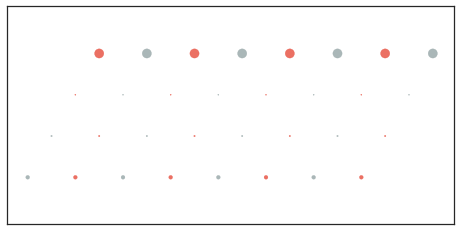

In [24]:
dotscale = 100
SAVE = False
name = 'solution_antiferroU' + str(U) + 'Nx' + str(Nx) + 'Ny' + str(Ny)
showLattice(nUp, nDown, Nx, Ny, nOrb, dotscale, SAVE, name)


# Show minimization of grandpotential functional

The final value of the grandpotential per site was:  0.324347095051


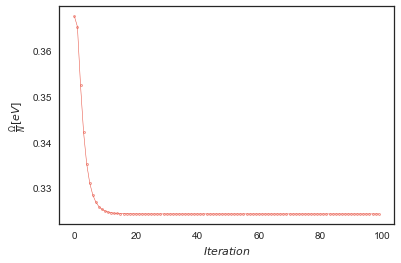

In [25]:
showGrandpotentialMinimization(itSwitch, lastIt, energies)
print("The final value of the grandpotential per site was: ", lastGrandpotential)